In [2]:
import pandas as pd
import tensorflow as tf 
import numpy as np
from matplotlib import pyplot as plt


In [3]:
df=pd.read_csv(r"D:\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3836,6872-HXFNF,Female,0,Yes,No,64,Yes,Yes,DSL,No,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),58.35,3756.45,No
3362,3658-KIBGF,Female,0,No,No,1,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,54.90,54.9,Yes
6429,6332-FBZRI,Male,0,Yes,Yes,67,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,One year,Yes,Credit card (automatic),69.35,4653.25,No
6542,3315-TOTBP,Male,0,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,76.00,1130.85,Yes
5332,4565-EVZMJ,Female,0,No,No,47,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,Yes,Mailed check,58.90,2813.05,No


In [4]:
df.drop('customerID',axis='columns',inplace=True)

In [5]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1156,Female,0,No,No,53,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.70,1005.7,No
5455,Female,0,No,No,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.70,129.55,No
6802,Female,0,No,No,20,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),89.10,1879.25,No
2410,Female,0,Yes,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,80.45,3398.9,No
3404,Female,0,No,Yes,35,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Credit card (automatic),55.60,2016.45,No


In [6]:
df.shape

(7043, 20)

In [7]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [8]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\ARUN\AppData\Local\Temp\ipykernel_46092\695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [9]:
df1.TotalCharges.dtypes

dtype('float64')

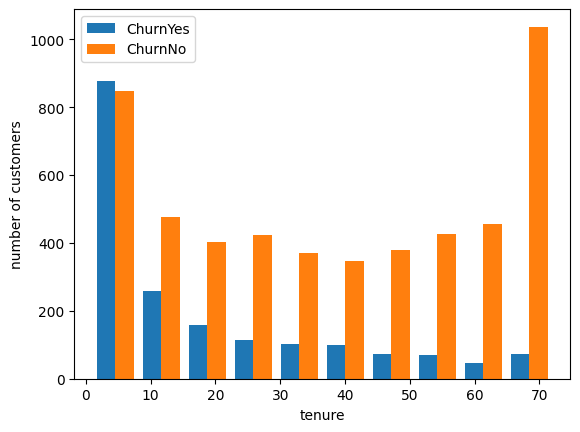

In [10]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('number of customers')


plt.hist([tenure_churn_yes,tenure_churn_no],label=['ChurnYes','ChurnNo'])
plt.legend()

In [11]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(" {} :  {}".format(column,df[column].unique()))

In [12]:
print_unique_col_values(df1)

 gender :  ['Female' 'Male']
 Partner :  ['Yes' 'No']
 Dependents :  ['No' 'Yes']
 PhoneService :  ['No' 'Yes']
 MultipleLines :  ['No phone service' 'No' 'Yes']
 InternetService :  ['DSL' 'Fiber optic' 'No']
 OnlineSecurity :  ['No' 'Yes' 'No internet service']
 OnlineBackup :  ['Yes' 'No' 'No internet service']
 DeviceProtection :  ['No' 'Yes' 'No internet service']
 TechSupport :  ['No' 'Yes' 'No internet service']
 StreamingTV :  ['No' 'Yes' 'No internet service']
 StreamingMovies :  ['No' 'Yes' 'No internet service']
 Contract :  ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling :  ['Yes' 'No']
 PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn :  ['No' 'Yes']


In [13]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)


C:\Users\ARUN\AppData\Local\Temp\ipykernel_46092\2589434152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\ARUN\AppData\Local\Temp\ipykernel_46092\2589434152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [14]:
print_unique_col_values(df1)

 gender :  ['Female' 'Male']
 Partner :  ['Yes' 'No']
 Dependents :  ['No' 'Yes']
 PhoneService :  ['No' 'Yes']
 MultipleLines :  ['No' 'Yes']
 InternetService :  ['DSL' 'Fiber optic' 'No']
 OnlineSecurity :  ['No' 'Yes']
 OnlineBackup :  ['Yes' 'No']
 DeviceProtection :  ['No' 'Yes']
 TechSupport :  ['No' 'Yes']
 StreamingTV :  ['No' 'Yes']
 StreamingMovies :  ['No' 'Yes']
 Contract :  ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling :  ['Yes' 'No']
 PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn :  ['No' 'Yes']


In [15]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)
    

C:\Users\ARUN\AppData\Local\Temp\ipykernel_46092\1062556104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [16]:
for col in df1:
    print("{} : {}".format(col,df1[col].unique()))

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [17]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\ARUN\AppData\Local\Temp\ipykernel_46092\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [18]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [19]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [20]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])


In [21]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
957,0,0,0,0,0.042254,1,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
3458,1,0,0,0,0.352113,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3631,1,1,1,0,0.000000,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1768,1,0,0,0,0.873239,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
4848,1,0,0,0,0.056338,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [22]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)


In [24]:
X_train.shape

(5625, 26)

In [25]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([keras.layers.Dense(20,input_shape=(26,),activation='relu'),keras.layers.Dense(1,activation='sigmoid')])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5380 - accuracy: 0.7276
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.7980
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4229 - accuracy: 0.8028
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4180 - accuracy: 0.8043
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8057
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4136 - accuracy: 0.8055
Epoch 7/100
176/176 [==============================] - 0s 987us/step - loss: 0.4132 - accuracy: 0.8075
Epoch 8/100
176/176 [==============================] - 0s 988us/step - loss: 0.4127 - accuracy: 0.8057
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4111 - accuracy: 0.8059
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4107 - ac

In [26]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.7896


[0.44471412897109985, 0.7896233201026917]

In [27]:
yp=model.predict(X_test)

44/44 [==============================] - 0s 914us/step


In [28]:
y_pred=[]
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [29]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 1, 0, 0]

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.88      0.86       999
           1       0.66      0.56      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

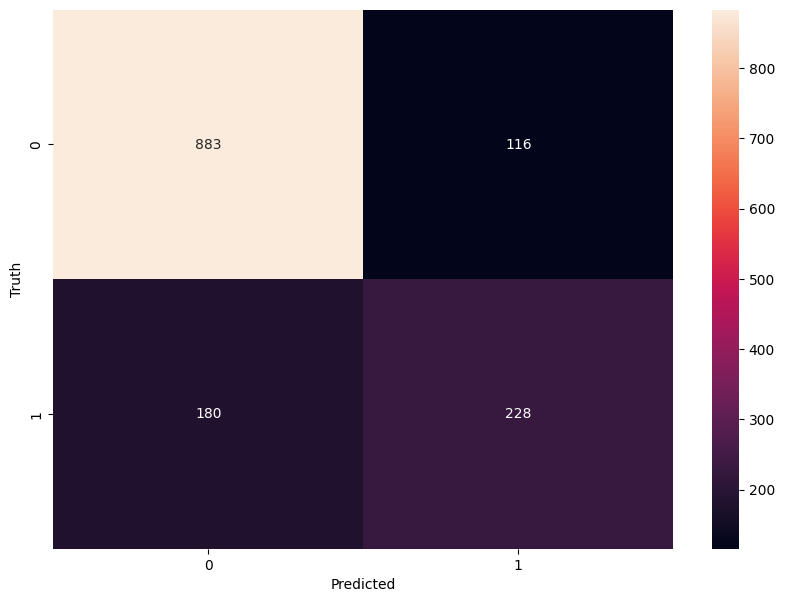

In [31]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [32]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [37]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')

x_sm, y_sm=smote.fit_resample(x,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)



In [39]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [40]:
model=keras.Sequential([keras.layers.Dense(20,input_shape=(26,),activation='relu'),keras.layers.Dense(1,activation='sigmoid')])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_sm,y_sm,epochs=100)

Epoch 1/100
323/323 [==============================] - 2s 2ms/step - loss: 0.5166 - accuracy: 0.7443
Epoch 2/100
323/323 [==============================] - 1s 2ms/step - loss: 0.4739 - accuracy: 0.7726
Epoch 3/100
323/323 [==============================] - 1s 2ms/step - loss: 0.4662 - accuracy: 0.7788
Epoch 4/100
323/323 [==============================] - 1s 2ms/step - loss: 0.4624 - accuracy: 0.7809
Epoch 5/100
323/323 [==============================] - 1s 2ms/step - loss: 0.4596 - accuracy: 0.7823
Epoch 6/100
323/323 [==============================] - 1s 2ms/step - loss: 0.4565 - accuracy: 0.7821
Epoch 7/100
323/323 [==============================] - 1s 3ms/step - loss: 0.4543 - accuracy: 0.7847
Epoch 8/100
323/323 [==============================] - 1s 3ms/step - loss: 0.4522 - accuracy: 0.7868
Epoch 9/100
323/323 [==============================] - 1s 2ms/step - loss: 0.4490 - accuracy: 0.7889
Epoch 10/100
323/323 [==============================] - 1s 2ms/step - loss: 0.4473 - accura

In [41]:
yp=model.predict(X_test)

65/65 [==============================] - 0s 2ms/step


In [42]:
y_pred=[]
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1033
           1       0.84      0.82      0.83      1033

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066

